In [9]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

# What are neural networks?

Discuss...

what is an...
- input layer
- hidden layer
- output layer/unit
- cost function
- activation function

what do you think NN are good for?

# Boolean logic

What is 
- AND
- OR
- XOR?


In [2]:
X = np.array([[0,0,1,1],[0, 1, 0, 1]]).T

In [3]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [4]:
y_and = X[:, 0] & X[:, 1]
y_or = X[:, 0] | X[:, 1]
y_xor = X[:, 0] ^ X[:, 1]

print(f"AND: {y_and}")
print(f"OR:  {y_or}")
print(f"XOR: {y_xor}")

AND: [0 0 0 1]
OR:  [0 1 1 1]
XOR: [0 1 1 0]


# Linear unit

Pretty much a linear model, so its output $y$ is 
$$y = X^Tw+b$$

Where... 
- $y$ is target variable array
- $X$ is input data matrix
- $w$ is weights array
- $b$ is bias or intercept

Many ways of finding $w$ and $b$ this with python; sklearn, statsmodels etc. to keep things simple we use numpy since that is what I have imported


Obviously when I say simple I mean difficult for ourselves, because that is when we learn things!

We can find the weights w using this equation

$$w = (X^TX)^{-1}X^Ty$$


## DIY

build your own linear unit class with numpy!

method ```calc_output``` implements $y = X^Tw+b$

method ```calc_params``` implements $w = (X^TX)^{-1}X^Ty$

Useful things to know in numpy...
- $X^T$ is ```X.T```
- $Xy$ is ```X.dot(y)```
- The inverse of $X^TX$ can be found using ```np.linalg.inv()```

if you add a dummy variable of ones to X like so...

``` dummies = np.ones(X.shape[0],1)
    X_b = np.append(dummies, X)
```

passing X_b to the implementation of the normal equation gives you an extra parameter, which is the bias term

# Exercise 1: Make your very own linear unit!

In [11]:
class LiU:
    
    # we can pass weights if we have pre-trained them
    def __init__(self, weights=None, bias=None):
        self.weights = weights
        self.bias = bias
        self.y = None
        self.weighted_input = None

    def calc_output(self, X):
        # linear equation with its params
        # Xw
        self.weighted_input = X.dot(self.weights)
        # Xw+b
        self.y = self.weighted_input + self.bias
        
    def calc_params(self, X, y):
        
        # get dummies for calculating bias
        dummies = np.ones((X.shape[0],1))
        X_b = np.append(dummies, X, axis=1)
        
        # normal equation implemenation
        #XT_X
        XT_X = X_b.T.dot(X_b)# fill in
        #inverse
        XT_X_inverse = np.linalg.inv(XT_X)# fill in
        #inverse_XT_y to get 
        params = XT_X_inverse.dot(X_b.T).dot(y)# fill in
        
        
        # seperate weights
        self.bias = params[0]
        self.weights = params[1:]

# Linear unit with boolean problems

In [13]:
and_LiU = LiU()
and_LiU.calc_params(X, y_and)
and_LiU.calc_output(X)
print(f"linear unit AND: {and_LiU.y}\nexpected AND:{y_and}")

linear unit AND: [-0.25  0.25  0.25  0.75]
expected AND:[0 0 0 1]


In [14]:
or_LiU = LiU()
or_LiU.calc_params(X,y_or)
or_LiU.calc_output(X)
print(f"linear unit OR: {or_LiU.y}\nexpected OR:{y_or}")

linear unit OR: [0.25 0.75 0.75 1.25]
expected OR:[0 1 1 1]


In [15]:
xor_LiU = LiU()
xor_LiU.calc_params(X,y_xor)
xor_LiU.calc_output(X)
print(f"linear unit XOR: {xor_LiU.y}\nexpected XOR:{y_xor}")

linear unit XOR: [0.5 0.5 0.5 0.5]
expected XOR:[0 1 1 0]


How did we do?

# Cost functions

Cost function, what's that?

## Mean Squared Error

Very common way of evalutation ML models across all observations.
Basically take the difference between the target and predictions, square it (so all errors are positive and bigger errors are made bigger-er) then average across all observations

$$ MSE = \frac{1}{n}\sum^{n}_{i=1} (y_i-\hat{y}_i)^2 $$

How to implement?
```np.square()```, ```np mean()``` and ```np.subtract()```work here

# Exercises 2 - 5: Your own cost functions!

In [16]:
def mean_squared_error(y_hat, y):
    """
    gets mean squared error
    Args:
        y_hat: predictions
        y: actual 
    """
    # get square of the errors
    squared_errors = np.square(np.subtract(y, y_hat))
    # get mean of the above
    mse = np.mean(squared_errors)
    
    return mse, squared_errors 

## Mean Absolute Error
Similar to mean squared error, except instead of squaring the error, we take the absolute (value without sign) error. So we take the postive difference between predicted and target 

$$ MSE = \frac{1}{n}\sum^{n}_{i=1} abs(y_i-\hat{y}_i) $$

```np.absolute()``` works here

In [17]:
def mean_absolute_error(y_hat, y):
    """
    gets mean squared error
    Args:
        y_hat: predictions
        y: actual
    """
    
    n = y.size
    abs_errors = np.absolute(np.subtract(y_hat,y))
    mas = np.mean(abs_errors)
    return mas, abs_errors 

## Cross entropy

In [19]:
def binary_log_loss(y_prob, y_target):
    
    losses = [ -np.log(p) if target==1
              else -np.log(1-p)
              for p, target in zip(y_prob, y_target)
             ]
    
    return sum(losses), losses

## Comparing cost functions

We can examine the difference between cost functions by computing the costs for each for a target of 1 across a range of predicted values from 0 to 1.

These can be intepreted as probablities, so the target 1 is the probability for the correct class
Therefore, we compute the cost for a range of probablistic outputs from a model where it is trying to output the target class

In [22]:
y_hat = np.linspace(0,1)
y_target = np.ones(y_hat.shape)
ll, losses = binary_log_loss(y_hat, y_target)
mse, squared_errors = mean_squared_error(y_hat,y_target)
mas, abs_errors = mean_absolute_error(y_hat,y_target)

/home/edd/.local/share/virtualenvs/reading_group-f2xz22ED/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


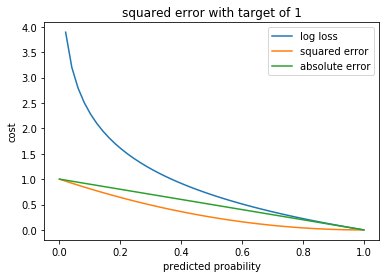

In [23]:
plt.plot(y_hat,losses)
plt.plot(y_hat,squared_errors )
plt.plot(y_hat, abs_errors)
plt.xlabel("predicted proability")
plt.ylabel("cost")
plt.title("squared error with target of 1")
plt.legend(["log loss", "squared error", "absolute error"]);

We can see that our binary log-loss penalises poor estimates more harshly, leading to a greater graidient.

While MSE and MAS might be good for evaluating models, log loss is better with gradient descent training algorithms

# Evaluating a linear unit

In [24]:
and_loss,_ = binary_log_loss(and_LiU.y, y_and)
and_mse,_ = mean_squared_error(and_LiU.y, y_and)
and_mas, _ = mean_absolute_error(and_LiU.y, y_and)
print(f"linear unit AND: {and_LiU.y}\nexpected AND:{y_and}\nlog-loss: {and_loss}\nMSE: {and_mse} \nMAS: {and_mas}")

linear unit AND: [-0.25  0.25  0.25  0.75]
expected AND:[0 0 0 1]
log-loss: 0.6399026660411329
MSE: 0.0625 
MAS: 0.25


In [25]:
or_loss,_ = binary_log_loss(or_LiU.y, y_or)
or_mse,_ = mean_squared_error(or_LiU.y, y_or)
or_mas, _ = mean_absolute_error(or_LiU.y, y_or)
print(f"linear unit or: {or_LiU.y}\nexpected or:{y_or}\nlog-loss: {or_loss}\nMSE: {or_mse} \nMAS: {or_mas}")

linear unit or: [0.25 0.75 0.75 1.25]
expected or:[0 1 1 1]
log-loss: 0.6399026660411329
MSE: 0.0625 
MAS: 0.25


not bad, if we say we can round, that works...

In [26]:
xor_loss,_ = binary_log_loss(xor_LiU.y, y_xor)
xor_mse,_ = mean_squared_error(xor_LiU.y, y_xor)
xor_mas, _ = mean_absolute_error(xor_LiU.y, y_xor)
print(f"linear unit xor: {xor_LiU.y}\nexpected xor:{y_xor}\nlog-loss: {xor_loss}\nMSE: {xor_mse} \nMAS: {xor_mas}")

linear unit xor: [0.5 0.5 0.5 0.5]
expected xor:[0 1 1 0]
log-loss: 2.772588722239781
MSE: 0.25 
MAS: 0.5


Ok, that is bad. 

## Why doesn't it work?

lets plot things

In [27]:
def plot_logic(X, 
               y, 
               w, 
               b, 
               title=None, 
               seperator=True, 
               auto_bb=False,
               x_label="X1",
               y_label="X0"):
    
    # create plots
    fig, ax = plt.subplots()
    # expand limits out so we can see everythinga
    if not auto_bb:
        ax.set_xlim(left=-0.2, right=1.2)
        ax.set_ylim(bottom=-0.2, top=1.2)
    
    # titles etc.
    if title is not None:
        plt.title(title)
    
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    # plot the linear decision boudary
    if seperator:
        # get cordinates
        x0 = np.linspace(-0.2, 2.2, 11)
        x1 = x0
        x0_cords, x1_cords = np.meshgrid(x0, x1)

        # put into array for computing coutour values
        X_values = np.array([[x0, x1]
                             for x0, x1 in it.product(x0, x1)
                             ])

        # get values using linear model and passed weight and bias
        contours = X_values.dot(w)+b
        contours = contours.reshape(x0.shape[0], x1.shape[0])
        # plot contours
        labels = ax.contour(x0_cords,
                            x1_cords,
                            contours,
                            levels=[0.5])
        labels.levels = np.array(["decision boundary"])
        ax.clabel(labels)

    # plot the binary values
    ax.scatter(X[:, 1], X[:, 0], c="k", marker="x")
    for x0_label, x1_label, y in zip(X[:, 0], X[:, 1], y):
        ax.text(x1_label,x0_label, y, fontsize=20)


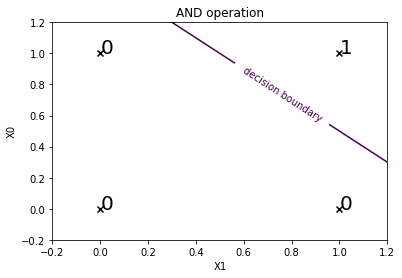

In [28]:
plot_logic(X,y_and,and_LiU.weights,and_LiU.bias, title="AND operation")

if we interpret that as a decision boundary we've train a binary linear classifier for AND

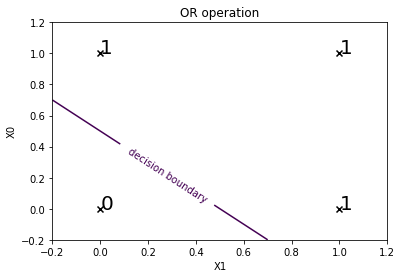

In [29]:
plot_logic(X,y_or,or_LiU.weights, or_LiU.bias, title="OR operation")

Very similar. Note; the only thing that changes is the bias term

In [30]:
print(f"and weights: {and_LiU.weights} - or weights: {or_LiU.weights}")
print(f"and bias: {and_LiU.bias} - or bias: {or_LiU.bias}")

and weights: [0.5 0.5] - or weights: [0.5 0.5]
and bias: -0.25 - or bias: 0.25


/home/edd/.local/share/virtualenvs/reading_group-f2xz22ED/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: No contour levels were found within the data range.


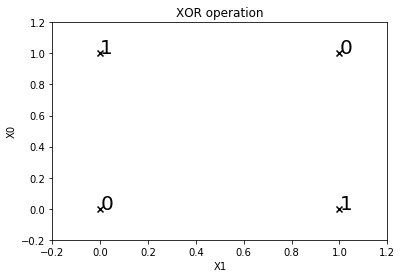

In [31]:
plot_logic(X,y_xor,xor_LiU.weights, xor_LiU.bias, title="XOR operation")

the warning is from the contour function in matplotlib, here is means it can't draw a decision boundary.
We see that XOR is not linearly seperable so we can't solve it with our linear unit


# Rectifier unit

A rectifier unit does what neural networks do a lot of the time. Bring some non-linearity to the problem. The rectifier unit applies a rectifier function to the output of the linear model. When we do this, this is called the activation function. So the output is.

$$ y = max(X^Tw+b, 0)$$

All it is doing is setting any output that would be  less than 0 as 0.
we can use ```np.maximum()``` to implement

# Exercise 6 - Rectifier function

Text(0, 0.5, 'output (y_rect)')

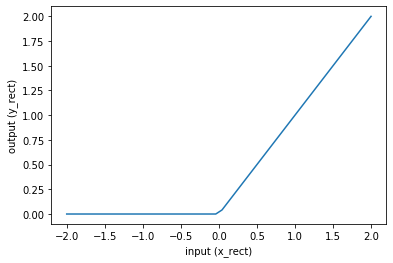

In [32]:
x_rect = np.linspace(-2,2)
y_rect = np.maximum(x_rect,0)# fill in
plt.plot(x_rect,y_rect)
plt.xlabel("input (x_rect)")
plt.ylabel("output (y_rect)")

Easy, now lets implement this. It is very similar to the LiU class, except we are not going to train the weights.

# Exercise 7 - Rectifier Linear Unit

In [37]:
class ReLU:

    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        self.y = None
        self.pre_trans_y = None
        self.weighted_input = None

    def calc_output(self, X):
        # linear equation with its params
        self.weighted_input = X.dot(self.weights)
        self.pre_trans_y = self.weighted_input + self.bias
        
        # final rectifed output
        self.y = np.maximum(self.pre_trans_y, 0) # fill in
        

This is not really enough to solve XOR, we need to add in another part of neural networks. The hidden layer.

# Building a hidden layer

This is one of the reasons neural networks are so powerful. Hidden layers create task relevant abstractions of the data. 

In [39]:
class HiddenLayer:

    def __init__(self, weight_matrix, bias_array, unit_type=ReLU):

        # create units in this layer
        self.units = [unit_type(weights=ws, bias=bs)
                      for ws, bs in zip(weight_matrix, bias_array)
                      ]

        # our output values are blank for now
        self.weighted_input = None
        self.pre_trans_output = None
        self.output = None

    def calc_output(self, X):

        # calculate each unit's output
        for unit in self.units:
            unit.calc_output(X)

        # store these computed outputs
        self.weighted_input = np.array([unit.weighted_input
                                        for unit in self.units])

        self.pre_trans_output = np.array([unit.pre_trans_y
                                          for unit in self.units])

        self.output = np.array([unit.y
                                for unit in self.units])

We are not going to train hidden layers or our rectifier unit, so we steal the weights from the book when we create them.
Backpropagation is used for this type of thing, which will *probably* be covered in a couple of sessions time

In [40]:
W_hidden = np.array([[1,1],[1,1]])
c = np.array([0, -1])

## Solving our boolean problems... nearly

With these, lets build a hidden layer

In [41]:
ReLU_layer = HiddenLayer(W_hidden, c)
ReLU_layer.calc_output(X)

And check these...

In [43]:
# XW or 6.8 in book
ReLU_layer.weighted_input.T

array([[0, 0],
       [1, 1],
       [1, 1],
       [2, 2]])

In [44]:
# 6.9 in book
ReLU_layer.pre_trans_output.T

array([[ 0, -1],
       [ 1,  0],
       [ 1,  0],
       [ 2,  1]])

the final output, compare this to the target xor output

In [45]:
# h matrix 6.10 in book
ReLU_layer.output.T

array([[0, 0],
       [1, 0],
       [1, 0],
       [2, 1]])

In [46]:
y_xor

array([0, 1, 1, 0])

In [47]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

What is this doing? What did we say hidden layers do?

/home/edd/.local/share/virtualenvs/reading_group-f2xz22ED/lib/python3.6/site-packages/ipykernel_launcher.py:44: UserWarning: No contour levels were found within the data range.


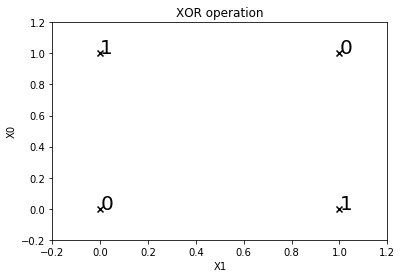

In [48]:
plot_logic(X,y_xor,xor_LiU.weights, xor_LiU.bias, title="XOR operation")

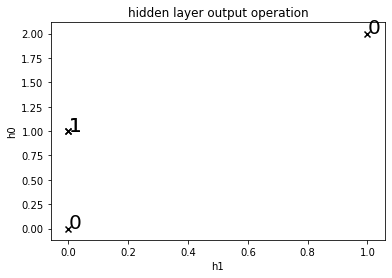

In [49]:
plot_logic(ReLU_layer.output.T,
           y_xor,
           xor_LiU.weights,  # i have to put something here
           xor_LiU.bias,  # it is just the way the function is written
           title="hidden layer output operation",
           seperator=False,
           auto_bb=True,
           y_label="h0",
           x_label="h1")

Can you see what it is doing yet?

## Finally solving XOR

lets use the hidden layer output with our linear xor solver that failed so badly last time...

In [50]:
xor_LiU.calc_params(ReLU_layer.output.T, y_xor)
xor_LiU.calc_output(ReLU_layer.output.T)

xor_loss,_ = binary_log_loss(xor_LiU.y, y_xor)
xor_mse,_ = mean_squared_error(xor_LiU.y, y_xor)
xor_mas, _ = mean_absolute_error(xor_LiU.y, y_xor)
print(f"linear unit xor: {xor_LiU.y}\nexpected xor:{y_xor}\nlog-loss: {xor_loss}\nMSE: {xor_mse} \nMAS: {xor_mas}")

linear unit xor: [0. 1. 1. 0.]
expected xor:[0 1 1 0]
log-loss: 0.0
MSE: 0.0 
MAS: 0.0


perfect!

## Why this works

lets have a look

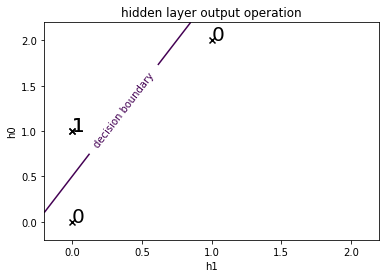

In [51]:
plot_logic(ReLU_layer.output.T,
           y_xor,
           xor_LiU.weights,
           xor_LiU.bias, 
           title="hidden layer output operation",
           seperator=True,
           auto_bb=True,
           y_label="h0",
           x_label="h1")

The problem is now linearly seperable, so we can solve it

# Done

## Happy?